# Customer Segmentation using K-Means Algorithm

In [116]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans 

In [117]:
# Importing the Mall customer dataset
customer_data = pd.read_csv('Mall_Customers.csv')

In [118]:
# Displaying the first five lines of the dataset
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [119]:
# Renaming the column names
customer_data.rename(columns = {'Genre':'Gender'}, inplace = True)

In [120]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [121]:
# getting the number of rows and columns in the dataset
customer_data.shape

(200, 5)

In [122]:
# statistical data
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [123]:
#datatypes in the dataset
customer_data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [124]:
# checking if there are any null values in the dataset
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [125]:
# dropping the customerID
customer_data.drop(['CustomerID'], axis=1,inplace=True)
customer_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


**Distribution Plot for Age, Income and Spending score**

/var/folders/qm/1nr0clpd7szcz7_5wpb344rr0000gn/T/ipykernel_23939/277009205.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer_data[x], bins=20)
/var/folders/qm/1nr0clpd7szcz7_5wpb344rr0000gn/T/ipykernel_23939/277009205.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer_data[x

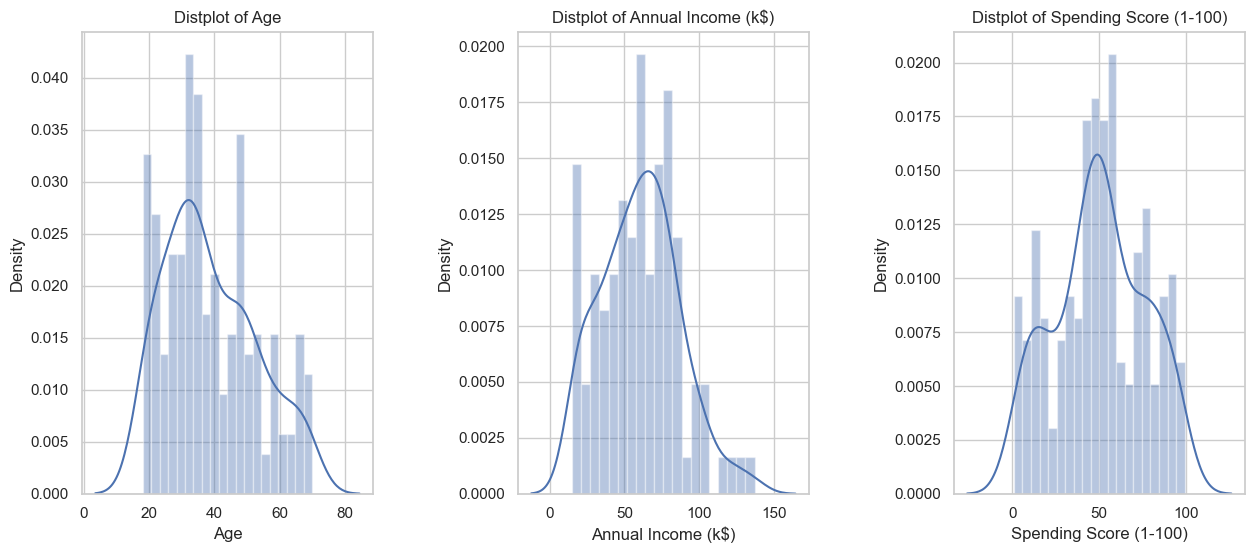

In [126]:
plt.figure(1, figsize=(15,6))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace = 0.5, wspace =0.5)
    sns.distplot(customer_data[x], bins=20)
    plt.title('Distplot of {}'.format(x))
plt.show()

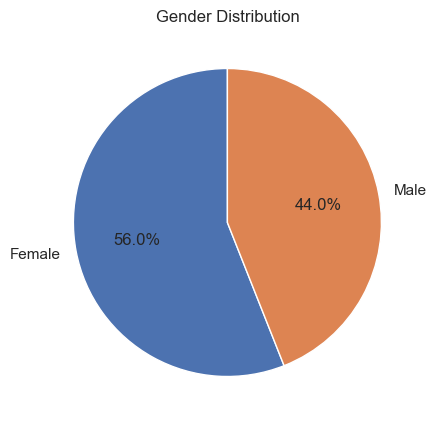

In [127]:
# Gender Distribution in the dataset
gender_counts = customer_data['Gender'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", startangle=90)
plt.title('Gender Distribution')
plt.show()

**Violin plot representation for Age, Anuual Income, Spending score based on Gender**

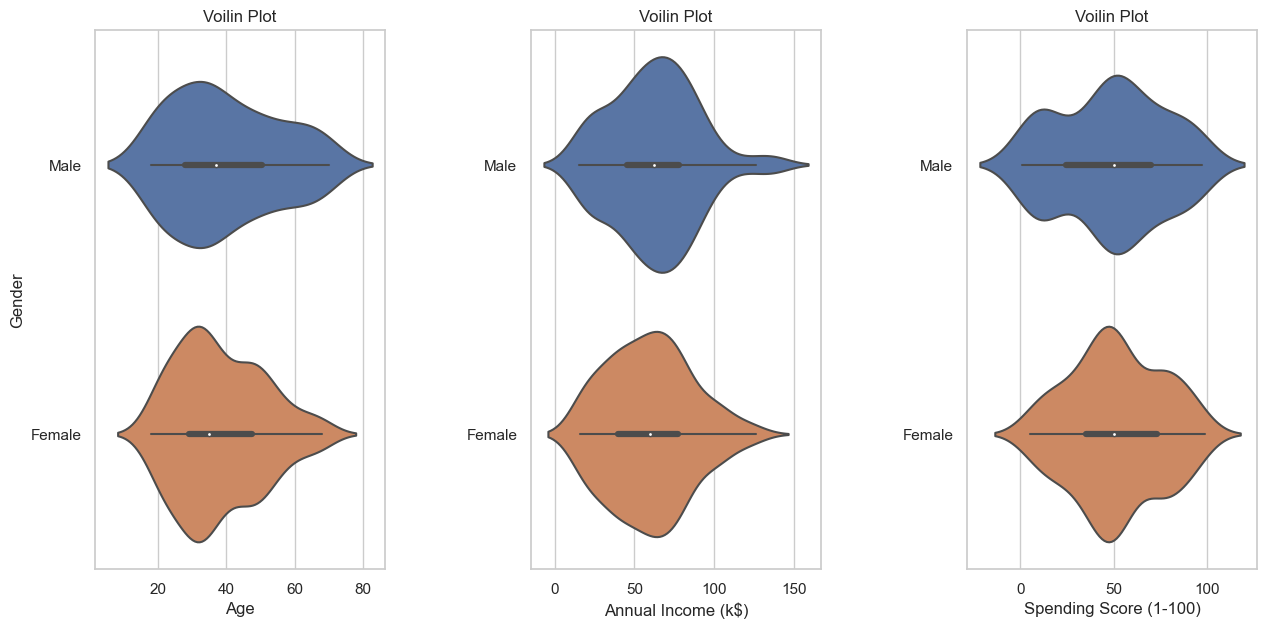

In [128]:
plt.figure(1, figsize = (15,7))
n = 0
for cols in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
  n += 1 
  plt.subplot(1,3,n)
  sns.set(style = 'whitegrid')
  plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
  sns.violinplot(x=cols, y = 'Gender', data = customer_data)
  plt.ylabel('Gender' if n==1 else '')
  plt.title('Voilin Plot')
plt.show()

**Bar plot to represent what Age group has highest number of customers**

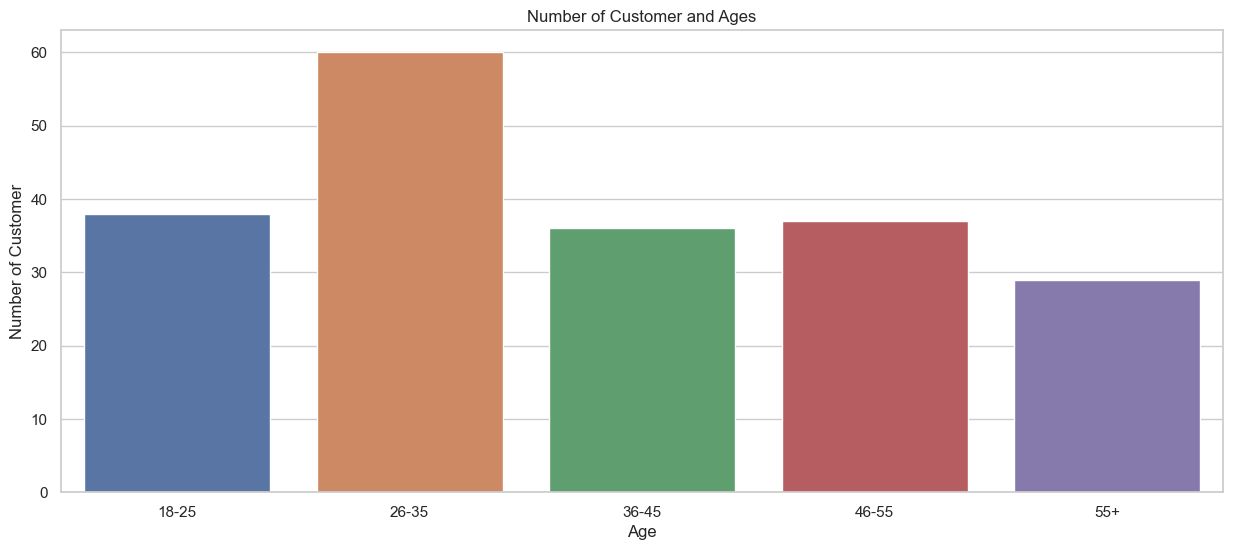

In [129]:
age_18_25 = customer_data.Age[(customer_data.Age >= 18) & (customer_data.Age <= 25)]
age_26_35 = customer_data.Age[(customer_data.Age >= 26) & (customer_data.Age <= 35)]
age_36_45 = customer_data.Age[(customer_data.Age >= 36) & (customer_data.Age <= 45)]
age_46_55 = customer_data.Age[(customer_data.Age >= 46) & (customer_data.Age <= 55)]
age_55above = customer_data.Age[(customer_data.Age >= 56)]

age_x = ['18-25','26-35','36-45','46-55','55+']
age_y = [len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_55above.values)]

plt.figure(figsize = (15,6))
sns.barplot(x=age_x, y=age_y,palette='deep')
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

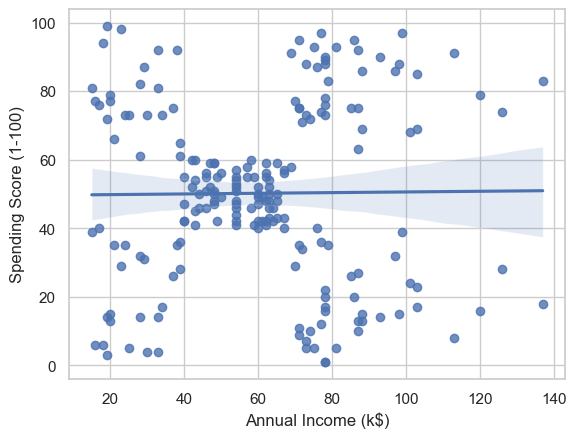

In [130]:
#finding relationship between Annual Income and Spending score
sns.regplot(x='Annual Income (k$)', y = 'Spending Score (1-100)', data = customer_data)

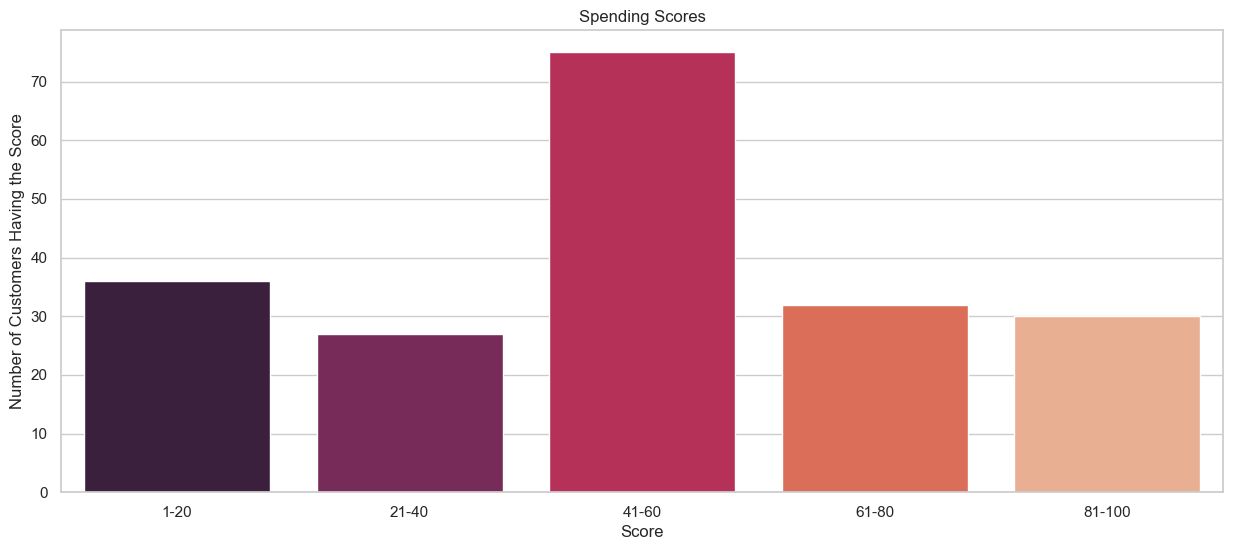

In [131]:
# finding number of customers using spending score
ss_1_20 = customer_data['Spending Score (1-100)'][(customer_data['Spending Score (1-100)']>=1) & (customer_data['Spending Score (1-100)'] <= 20)]
ss_21_40 = customer_data['Spending Score (1-100)'][(customer_data['Spending Score (1-100)']>=21) & (customer_data['Spending Score (1-100)'] <= 40)]
ss_41_60 = customer_data['Spending Score (1-100)'][(customer_data['Spending Score (1-100)']>=41) & (customer_data['Spending Score (1-100)'] <= 60)]
ss_61_80 = customer_data['Spending Score (1-100)'][(customer_data['Spending Score (1-100)']>=61) & (customer_data['Spending Score (1-100)'] <= 80)]
ss_81_100 = customer_data['Spending Score (1-100)'][(customer_data['Spending Score (1-100)']>=81) & (customer_data['Spending Score (1-100)'] <= 100)]

ssx = ['1-20', '21-40', '41-60', '61-80', '81-100']
ssy = [len(ss_1_20.values), len(ss_21_40.values), len(ss_41_60.values), len(ss_61_80.values), len(ss_81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette='rocket')
plt.title('Spending Scores')
plt.xlabel('Score')
plt.ylabel('Number of Customers Having the Score')
plt.show()



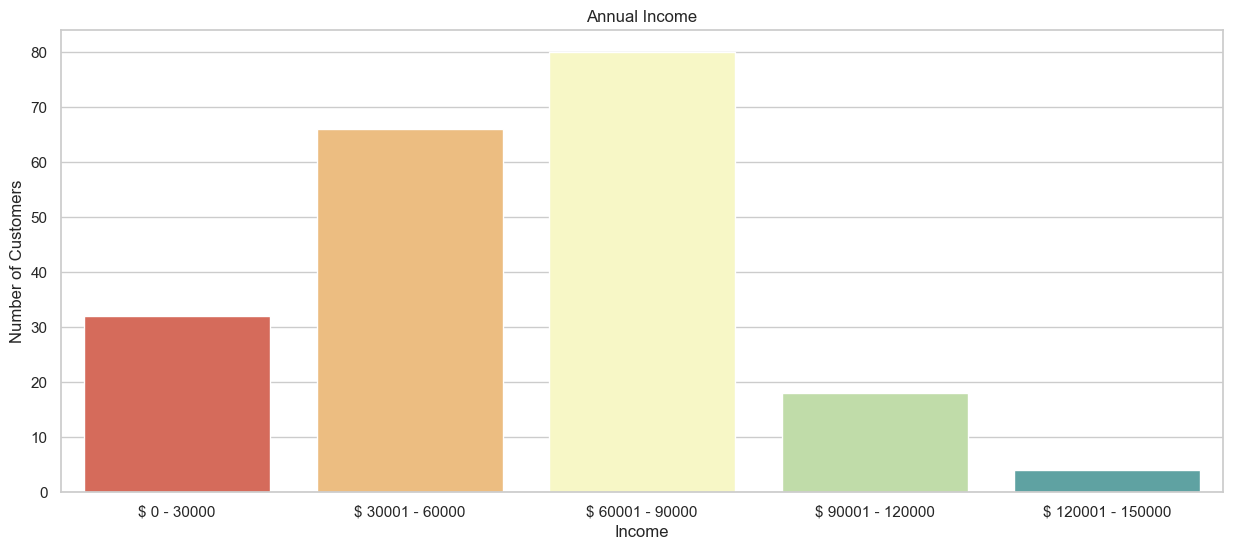

In [132]:
#finding number of customer using Annual Income

ai0_30 = customer_data['Annual Income (k$)'][(customer_data['Annual Income (k$)']>= 0) & (customer_data['Annual Income (k$)']<= 30)]
ai31_60 = customer_data['Annual Income (k$)'][(customer_data['Annual Income (k$)']>= 31) & (customer_data['Annual Income (k$)']<= 60)]
ai61_90 = customer_data['Annual Income (k$)'][(customer_data['Annual Income (k$)']>= 61) & (customer_data['Annual Income (k$)']<= 90)]
ai91_120 = customer_data['Annual Income (k$)'][(customer_data['Annual Income (k$)']>= 91) & (customer_data['Annual Income (k$)']<= 120)]
ai121_150 = customer_data['Annual Income (k$)'][(customer_data['Annual Income (k$)']>= 121) & (customer_data['Annual Income (k$)']<= 150)]

aix = ['$ 0 - 30000', '$ 30001 - 60000', '$ 60001 - 90000','$ 90001 - 120000', '$ 120001 - 150000']
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette='Spectral')
plt.title('Annual Income')
plt.xlabel('Income')
plt.ylabel('Number of Customers')
plt.show()


/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/clust

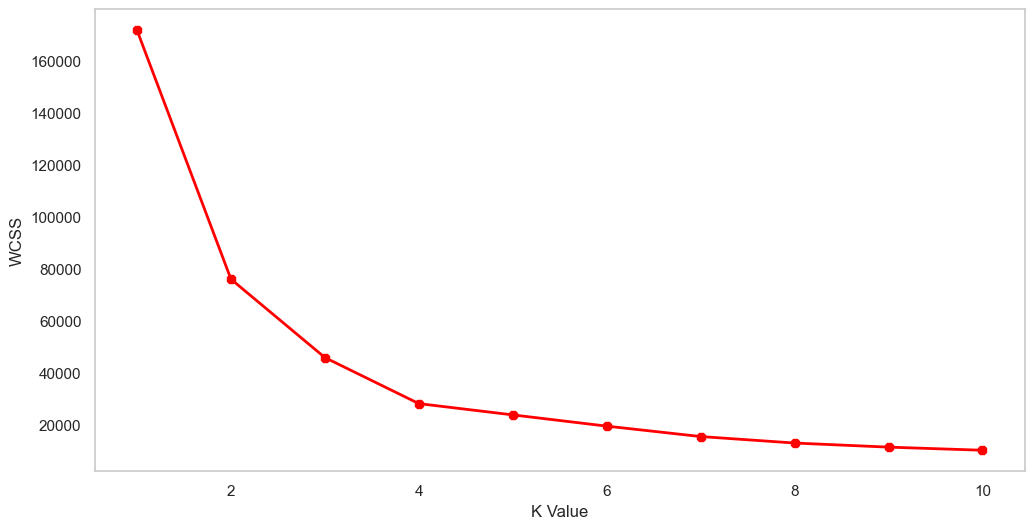

In [133]:
#Clustering based on Age and Spending Score

X1 = customer_data.loc[:,['Age', 'Spending Score (1-100)']].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(1, figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color='red', marker='8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()


In [134]:
# optimum clusters required is 4
kmeans = KMeans(n_clusters = 4)
label = kmeans.fit_predict(X1)
print(label)

[1 0 3 0 1 0 3 0 3 0 3 0 3 0 3 0 1 1 3 0 1 0 3 0 3 0 3 1 3 0 3 0 3 0 3 0 3
 0 3 0 2 0 2 1 3 1 2 1 1 1 2 1 1 2 2 2 2 2 1 2 2 1 2 2 2 1 2 2 1 1 2 2 2 2
 2 1 2 1 1 2 2 1 2 2 1 2 2 1 1 2 2 1 2 1 1 1 2 1 2 1 1 2 2 1 2 1 2 2 2 2 2
 1 1 1 1 1 2 2 2 2 1 1 1 0 1 0 2 0 3 0 3 0 1 0 3 0 3 0 3 0 3 0 1 0 3 0 2 0
 3 0 3 0 3 0 3 0 3 0 3 0 2 0 3 0 3 0 3 0 3 1 3 0 3 0 3 0 3 0 3 0 3 0 3 0 1
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [135]:
#finding centroids
print(kmeans.cluster_centers_)

[[30.1754386  82.35087719]
 [27.61702128 49.14893617]
 [55.70833333 48.22916667]
 [43.29166667 15.02083333]]


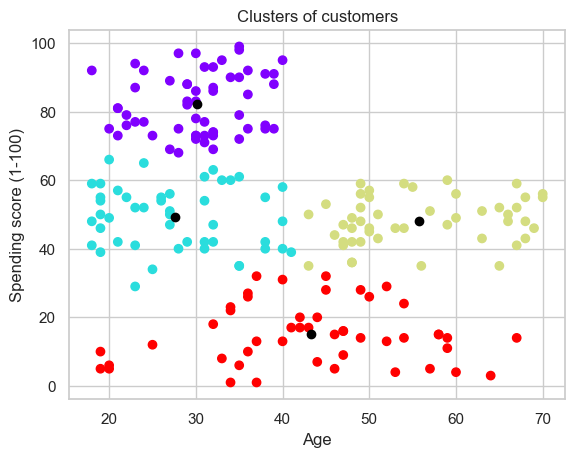

In [136]:
#visualizing using Scatter Plot

plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending score (1-100)')
plt.show()


here we can see four clusters, the whole data is divided into and black dot represent centroid of each cluster

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/clust

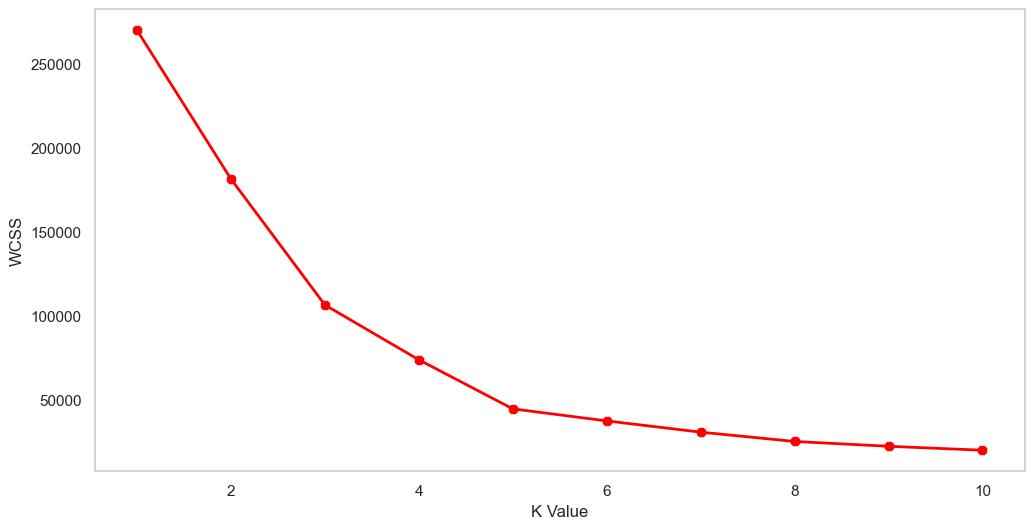

In [141]:
#Clustering based on Annual Income and Spending Score

X2 = customer_data.loc[:,['Annual Income (k$)', 'Spending Score (1-100)']].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(1, figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color='red', marker='8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()

In [142]:
# optimum clusters required is 5
kmeans = KMeans(n_clusters = 5)
label = kmeans.fit_predict(X2)
print(label)

[3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 0 3 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [143]:
#finding centroids
print(kmeans.cluster_centers_)

[[55.2962963  49.51851852]
 [88.2        17.11428571]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]
 [86.53846154 82.12820513]]


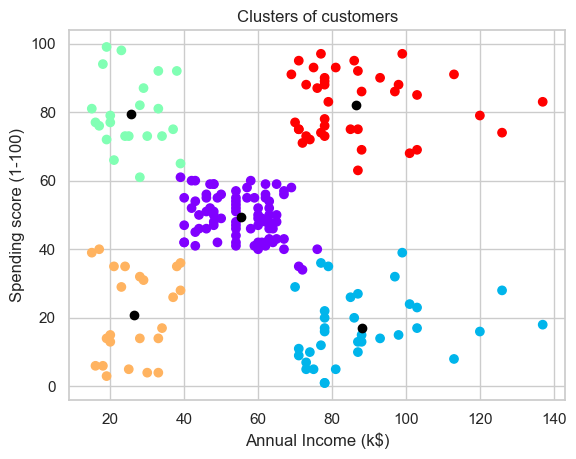

In [144]:
#visualizing using Scatter Plot

plt.scatter(X2[:,0], X2[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending score (1-100)')
plt.show()


/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/clust

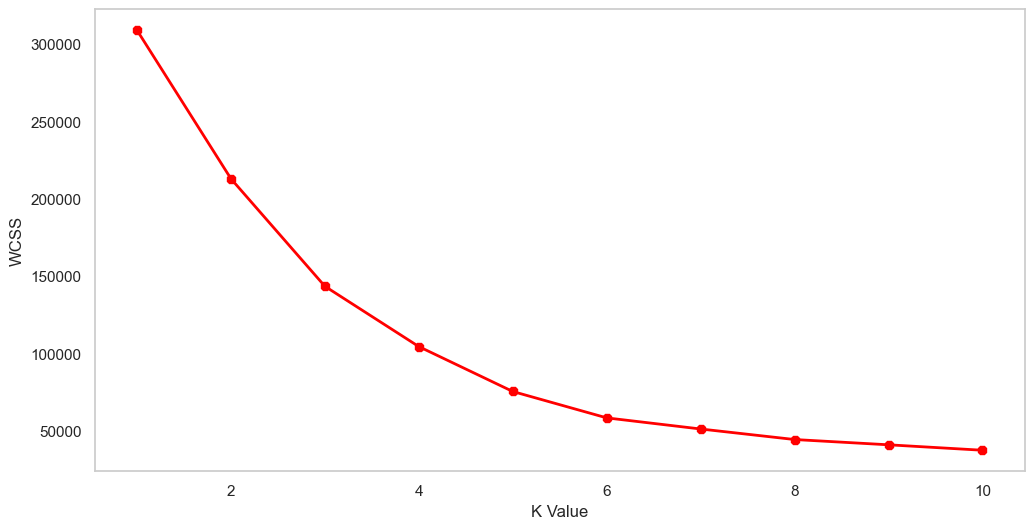

In [145]:
X3 = customer_data.iloc[:,1:]

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.figure(1, figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color='red', marker='8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()


In [146]:
# optimum clusters required is 5
kmeans = KMeans(n_clusters = 5)
label = kmeans.fit_predict(X3)
print(label)

[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 1 0 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 3 2 3 1 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 1 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [147]:
#finding centroids
print(kmeans.cluster_centers_)

[[45.2173913  26.30434783 20.91304348]
 [42.9375     55.0875     49.7125    ]
 [40.66666667 87.75       17.58333333]
 [32.69230769 86.53846154 82.12820513]
 [25.27272727 25.72727273 79.36363636]]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


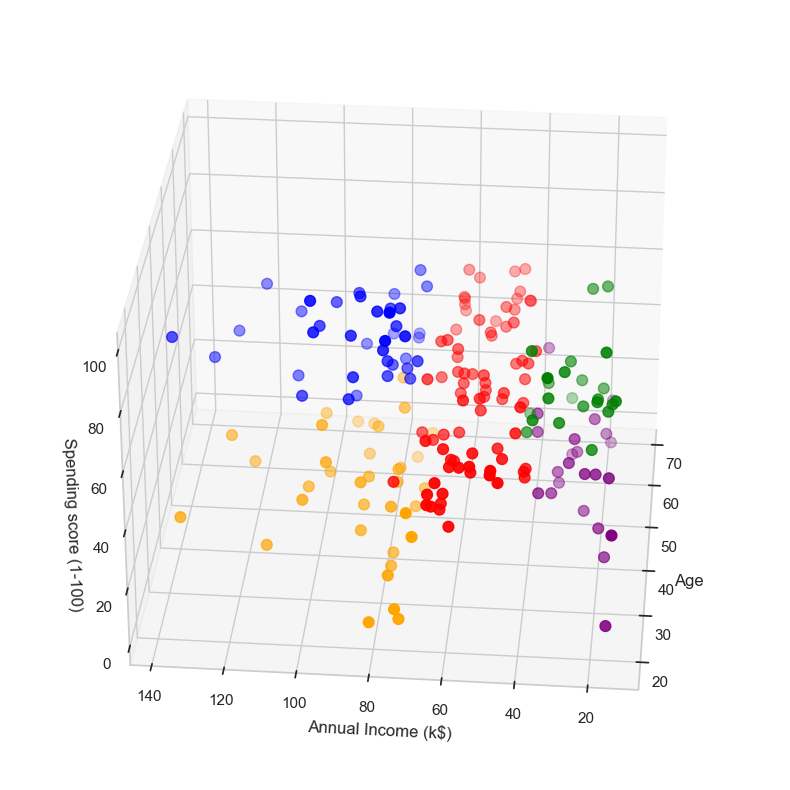

In [152]:
#visualizing using 3D graph

clusters = kmeans.fit_predict(X3)
customer_data['label'] = clusters

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(customer_data.Age[customer_data.label == 0], customer_data['Annual Income (k$)'][customer_data.label == 0], customer_data['Spending Score (1-100)'][customer_data.label == 0], c ='blue', s = 60)
ax.scatter(customer_data.Age[customer_data.label == 1], customer_data['Annual Income (k$)'][customer_data.label == 1], customer_data['Spending Score (1-100)'][customer_data.label == 1], c ='red', s = 60)
ax.scatter(customer_data.Age[customer_data.label == 2], customer_data['Annual Income (k$)'][customer_data.label == 2], customer_data['Spending Score (1-100)'][customer_data.label == 2], c ='green', s = 60)
ax.scatter(customer_data.Age[customer_data.label == 3], customer_data['Annual Income (k$)'][customer_data.label == 3], customer_data['Spending Score (1-100)'][customer_data.label == 3], c ='orange', s = 60)
ax.scatter(customer_data.Age[customer_data.label == 4], customer_data['Annual Income (k$)'][customer_data.label == 4], customer_data['Spending Score (1-100)'][customer_data.label == 4], c ='purple', s = 60)

ax.view_init(30,185)

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending score (1-100)')

plt.show()

